Pontifícia Universidade Católica de São Paulo 

`Ciência de Dados e Inteligência Artificial`

Aula 16-11-2021


---
> 👨‍🏫*Professor Rooney Coelho (rracoelho@pucsp.br)*
---


## Introdução

Existem muitos modelos de **clustering** disponíveis. Neste notebook estaremos apresentando o modelo que é considerado o mais simples entre eles. Apesar de sua simplicidade, o **K-means** é amplamente usado para realizar agrupamentosem muitas aplicações de ciência de dados, e é especialmente útil se você precisar descobrir rapidamente insights de **dados não rotulados**. Neste exercício, você aprende como usar k-Means para segmentação de clientes.

Algumas aplicações do mundo real de k-means:
- Segmentação de clientes
- Entender o que os visitantes de um site estão tentando realizar
- Reconhecimento de padrões
- Aprendizado de máquina
- Compressão de dados

### Segmentação de clientes com K-Means

Imagine que você tenha um conjunto de dados do cliente e precise aplicar a segmentação do cliente a esses dados históricos. A segmentação de clientes é a prática de particionar uma base de clientes em grupos de indivíduos com características semelhantes. É uma estratégia significativa, pois uma empresa pode ter como alvo esses grupos específicos de clientes e alocar recursos de marketing de forma eficaz. Por exemplo, um grupo pode conter clientes de alto lucro e baixo risco, ou seja, mais propensos a comprar produtos ou assinar um serviço. Uma tarefa empresarial é reter esses clientes. Outro grupo pode incluir clientes de organizações sem fins lucrativos. E assim por diante.


In [ ]:
# Execute este bloco para satisfazer as dependências
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 

import random # setar a semente

In [ ]:
np.random.seed(123) # execute esse bloco para poder reproduzir seus resultados posteriormente, use exatamente as mesmas etapas para isto!

In [ ]:
# Importe a base de dados executando este bloco
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv')
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [ ]:
df.dtypes

Customer Id          int64
Age                  int64
Edu                  int64
Years Employed       int64
Income               int64
Card Debt          float64
Other Debt         float64
Defaulted          float64
Address             object
DebtIncomeRatio    float64
dtype: object

In [ ]:
df['Defaulted'].unique()

array([ 0.,  1., nan])

1) Remova a chave primária 'Customer Id' e o campo de texto 'Address'. Esses valores não são features para nosso problema.

In [ ]:
df.drop(['Customer Id', 'Address'], axis=1, inplace=True)
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


2) A coluna Defaulted contém valores faltantes, substitua todos esses valores pelo número de maior frequência. Converta depois a colunas para inteiro.

In [ ]:
valor = df['Defaulted'].value_counts().index[0]
df['Defaulted'].replace(np.nan, valor, inplace=True)
df['Defaulted'] = df['Defaulted'].astype('int')
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0,6.3
1,47,1,26,100,4.582,8.218,0,12.8
2,33,2,10,57,6.111,5.802,1,20.9
3,29,2,4,19,0.681,0.516,0,6.3
4,47,1,31,253,9.308,8.908,0,7.2


3)  Normalizando sobre o desvio padrão
Agora vamos normalizar o conjunto de dados. Mas por que precisamos de normalização em primeiro lugar? A normalização é um método estatístico que ajuda algoritmos que envolvem cálculos de distâncias a interpretar recursos com diferentes magnitudes e distribuições de forma equalitária. Usamos o __StandardScaler()__ para normalizar nosso conjunto de dados.

* Normalize os dados e salve na variável `X`, note que ela é um objeto do numpy.

In [ ]:
# Normalizar o dataset
X = StandardScaler().fit_transform(df)
X

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

Para validar o procedimento feito pegue todos os dados da primeira coluna (use fatiamento do array) e calcule sua média e desvio padrão.

In [ ]:
print('Média: ', X[:,0].mean(), 'Desvio-padrão: ', X[:,0].std())

Média:  -2.1525265230379505e-16 Desvio-padrão:  1.0


In [ ]:
print('Média: ', X[:,3].mean(), 'Desvio-padrão: ', X[:,3].std())

Média:  6.478477884871501e-17 Desvio-padrão:  0.9999999999999999


Em nosso exemplo (se não tivéssemos acesso ao algoritmo k-means), seria o mesmo que adivinhar que cada grupo de clientes teria certa idade, renda, escolaridade, etc, com vários testes e experimentos. No entanto, usando o cluster K-means podemos fazer todo esse processo muito mais fácil.

Vamos aplicar k-means em nosso conjunto de dados e dar uma olhada nos rótulos do cluster.

### Configurando o K-means
A classe KMeans tem muitos parâmetros que podem ser usados, mas usaremos estes três:
<ul>
     <li> <b> init </b>: Método de inicialização dos centróides. </li>
     <ul>
         <li> O valor será: "k-means ++" </li>
         <li> k-means ++: Seleciona os centros de cluster iniciais para o cluster k-mean de uma forma inteligente para acelerar a convergência. Este é o algoritmo padrão da biblioteca. </li>
     </ul>
     <li> <b> n_clusters </b>: O número de clusters a serem formados, bem como o número de centróides a serem gerados. </li>
     <li> <b> n_init </b>: Número de vezes que o algoritmo k-means será executado com diferentes sementes de centróide. Os resultados finais serão o melhor resultado de n_init execuções consecutivas em termos de inércia. </li>
</ul>

4) Configure e treine o algoritmo K-means para 3 clusters e utilize 12 inicializações distintas.

In [ ]:
k_means = KMeans( n_clusters=3, n_init=12)
k_means.fit(X)

KMeans(n_clusters=3, n_init=12)

Imprima os rótulos de cada cliente:

In [ ]:
labels = k_means.labels_
print(labels)

[2 0 1 2 0 0 2 2 2 0 1 2 2 2 1 2 2 2 0 2 2 2 1 0 0 2 2 2 2 2 2 0 1 2 2 2 1
 1 2 0 1 0 2 0 2 0 2 2 2 2 0 0 1 2 1 1 1 2 2 2 0 2 0 0 2 2 2 1 2 1 2 2 2 2
 2 2 2 2 0 2 2 1 0 2 0 2 2 2 1 1 2 2 1 1 2 2 2 2 1 2 1 0 2 1 1 0 2 2 2 2 2
 2 2 1 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 0 2 2 1
 2 2 2 0 1 2 2 2 2 0 1 1 2 0 2 2 2 2 2 2 2 2 0 2 2 1 2 1 2 2 1 0 1 2 2 0 1
 0 2 2 2 2 2 0 2 1 2 2 2 0 0 2 0 2 1 2 2 1 2 0 2 1 2 2 2 2 2 1 1 0 2 2 1 0
 2 2 2 2 0 2 2 1 2 2 2 2 0 2 2 1 0 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 0 1 2 1 2
 2 2 0 2 1 0 1 2 0 2 2 1 2 2 2 2 1 1 1 2 2 2 0 2 2 0 2 0 2 2 0 2 2 2 1 2 2
 1 2 1 0 2 2 2 2 1 2 2 1 1 2 2 2 2 2 2 2 2 1 2 1 0 2 1 2 2 2 1 1 2 2 2 0 1
 2 2 1 2 0 2 2 2 2 2 1 0 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 0 1 2 1 2 2 2 0 0 2
 1 2 0 1 1 2 2 2 1 2 2 2 2 2 0 2 0 2 2 2 2 1 2 1 2 2 2 0 2 2 2 2 1 2 2 1 1
 0 2 2 2 2 2 1 1 2 0 1 0 2 2 1 2 2 0 0 2 1 2 2 0 2 1 2 0 2 2 2 0 2 2 2 2 0
 2 1 2 2 2 2 0 1 2 2 0 2 1 2 2 0 2 0 2 2 2 2 2 2 2 0 0 2 2 0 2 1 2 2 2 1 2
 1 2 2 2 2 2 0 1 1 2 0 2 

5) Obtenção dos Insights

Adicione os rótulos de cada grupo ao dataframe (antes da normalização) e chame essa coluna de grupo.

In [ ]:
df['Group'] = labels
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Group
0,41,2,6,19,0.124,1.073,0,6.3,2
1,47,1,26,100,4.582,8.218,0,12.8,0
2,33,2,10,57,6.111,5.802,1,20.9,1
3,29,2,4,19,0.681,0.516,0,6.3,2
4,47,1,31,253,9.308,8.908,0,7.2,0


Use agora o método `group_by` do pandas para ver o perfil de cada grupo criado. Faça a média dos valores, assim obtendo a informação do centróide.

In [ ]:
df.groupby('Group').mean()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Group,,,,,,,,
0,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.129252,13.915646
1,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.987952,13.994578
2,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991


O k-means irá dividir seus clientes em grupos mutuamente exclusivos, por exemplo, em 3 clusters. Os clientes em cada cluster são semelhantes entre si demograficamente.

**Agora podemos criar um perfil para cada grupo, considerando as características comuns de cada cluster!**

Isso que acabamos de fazer é a análise dos centróides.



In [ ]:
k_means = KMeans(n_clusters=5).fit(X)
df['Group'] = k_means.labels_
df.groupby('Group').mean()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Group,,,,,,,,
0,31.783439,1.764331,3.955414,30.783439,1.610318,2.774637,0.987261,14.238854
1,33.750000,3.489130,5.293478,43.826087,1.164326,2.485087,0.076087,8.829348
2,43.325000,2.250000,17.300000,136.925000,8.129825,13.104575,0.475000,19.442500
3,32.075419,1.310056,6.055866,29.720670,0.702022,1.538961,0.000000,7.894693
4,41.694581,1.463054,16.320197,72.374384,1.989369,4.323054,0.009852,9.823153


In [ ]:
df['Group'].value_counts()

3    358
4    203
0    157
1     92
2     40
Name: Group, dtype: int64

## Exemplo da Joaninha

In [2]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 

In [3]:
img = imread('/content/ladybug.png')

In [17]:
img.shape

(533, 800, 3)

In [7]:
X = img.reshape(-1,3)

In [25]:
kmeans = KMeans(n_clusters=8).fit(X)

In [26]:
img2 = kmeans.cluster_centers_[kmeans.labels_]
img2 = img2.reshape( img.shape )

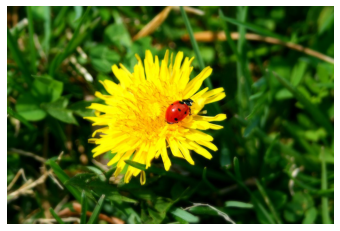

In [27]:
plt.imshow(img);
plt.axis('off');

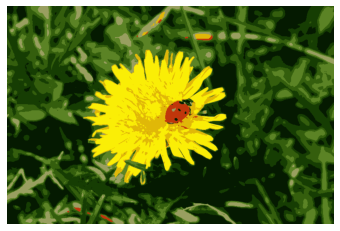

In [28]:
plt.imshow(img2);
plt.axis('off');
#plt.savefig('img2.png', dpi=300)

In [29]:
imgs = []
n_cores = [10, 8, 6, 4, 2]

for n_clusters in n_cores:
  kmeans = KMeans(n_clusters=n_clusters).fit(X)
  img2 = kmeans.cluster_centers_[kmeans.labels_]
  imgs.append( img2.reshape( img.shape ) )

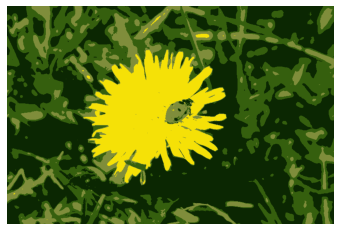

In [30]:
plt.imshow(imgs[3]);
plt.axis('off');

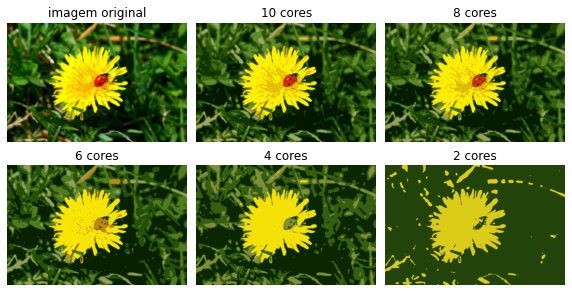

In [38]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(img)
plt.title('imagem original')
plt.axis('off')

for idx,n_clusters in enumerate(n_cores):
  plt.subplot(232 + idx)
  plt.imshow(imgs[idx])
  plt.title('{} cores'.format(n_clusters))
  plt.axis('off')

plt.savefig('segmentacao.png', dpi=300)

## Cluster hierárquico

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

from scipy.spatial import distance_matrix
from scipy.cluster import hierarchy

In [54]:
X, _ = make_blobs(n_samples=50, centers=[[4,4],[-2,-1],[1,1],[10,4]], cluster_std=0.9)

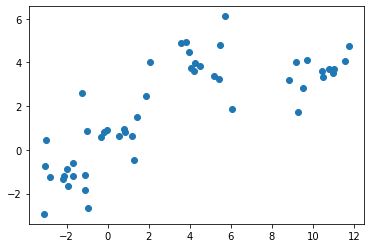

In [56]:
plt.plot( X[:,0], X[:,1] ,'o')

In [78]:
#agglom = AgglomerativeClustering().fit(X)

In [71]:
# Matriz de distâncias
distance_matrix = distance_matrix(X,X)

In [73]:
Z = hierarchy.linkage( distance_matrix, method='complete' )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


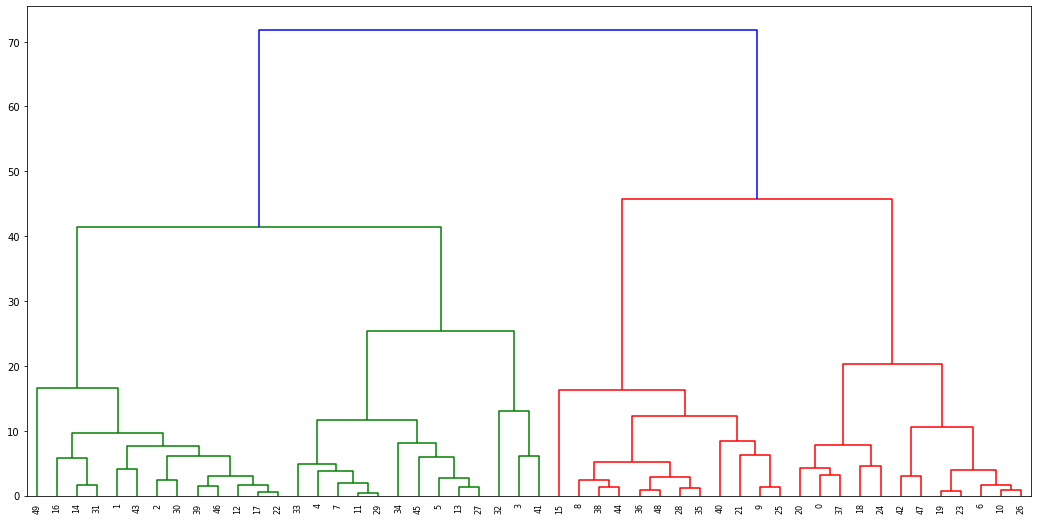

In [77]:
plt.figure(figsize=(18,9))
dendro = hierarchy.dendrogram(Z)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


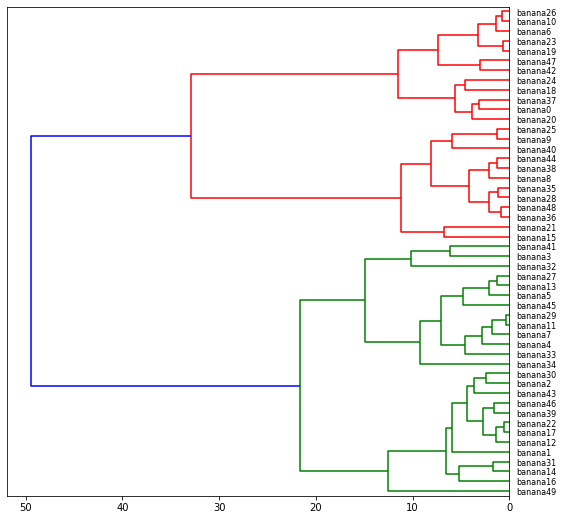

In [84]:
plt.figure(figsize=(9,9))
Z = hierarchy.linkage( distance_matrix, method='average')
dendro = hierarchy.dendrogram(Z, orientation='left', labels=['banana' + str(i) for i in range(50)])